In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
#data 

# order book -> contains the best bid, best ask at every instant (only 1)
# message file -> contains the type of the order being placed, at what price

#assumptions
#to simply things a bit 

# quantity of any order is 1 -> in real time, we will have the quantity in the dataframe itself, which can be directly used
# each order arrives in 1 sec -> in real time, we just need time for tracking total time for finding rates

In [42]:

# message CSV contains this order details
# for sample lets take :  1 is limit buy
#                         2 is limit sell 
#                         3 is market buy
#                         4 is market sell
#                         5 is cancelling a buy 
#                         6 is cancelling a sell


# the orderbook csv contains the best of ask and bid values at every instant

# for example prices are between 0 to 10000, with each tick being 100, 
# then we have total 10000/100 = 100 different ticks with 0th tick representing price 0, 1st tick -> 100
# --> tick_size = 100, total 100 ticks

# thus tick  = price/100 
# as i mentioned, the price ranges in both message file and order book file are between 0 and 10000


In [43]:
# 4 stages

# Vector X

In [44]:
def update_vector(x, order_type, p, PA, PB):

    p_index = int( p/100 )
    pa_index = int(PA/100)
    pb_index = int(PB /100)

    if order_type == 1:  # Limit buy order at price p < pa
        if p < PA:
            x[p_index] -= 1

        else :
            # if any buy limit order comes without following the condition that p<pa, then that will be treated as market order
            x[pa_index] -= 1


    elif order_type == 2:  # Limit sell order at price p > pb
        
        if p > PB:
            x[p_index] += 1
        else : 
            # if any sell limit order comes without following the condition that p>pb, then that will be treated as market order
            x[pb_index] += 1    

    elif order_type == 3:  # Market buy order at ask price pa
        x[pa_index] -= 1

    elif order_type == 4:  # Market sell order at bid price pb
        x[pb_index] += 1

    elif order_type == 5:  # Cancellation of a buy order at price p < pa
        if p < PA and  x[p_index] <0:
            x[p_index] += 1

    elif order_type == 6:  # Cancellation of a sell order at price p > pb
        if p > PB and x[p_index] > 0:
            x[p_index] -= 1


    return x
        

In [45]:

message_sample = pd.read_csv("message_sample.csv")
orderbook_sample = pd.read_csv("orderbook_sample.csv")

x = [0]*100

for i in range(len(message_sample)) :
    type = message_sample['type'][i]
    p =  message_sample['price'][i]
    pa = orderbook_sample['a1'][i]
    pb = orderbook_sample['b1'][i]

    x = update_vector (x, type, p, pa, pb)

print(x)

print(x.count(-4))
print(x.count(-3))
print(x.count(-2))
print(x.count(-1))
print(x.count(0))
print(x.count(1))
print(x.count(2))
print(x.count(3))
print(x.count(4))
print(x.count(5))




[0, 0, 4, 4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, -2, 4, 2, 0, -4, 3, 0, 0, 0, 3, 0, -3, 0, 0, 0, 5, 0, 0, 0, -1, -4, -4, 0, 6, 2, 0, 0, 1, 2, 2, -3, 0, -3, 0, -1, 3, 0, 0, 0, -3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3
4
1
2
69
1
10
3
5
1


## Limit order arrrival rate <br> Lambda (i) {for first 6 distances}

In [46]:
# let us say each instance is 1 sec, thus we have 250 orders in total time of 250 sec = 250/60 minutes
# thus

T = 250/60
Nl_bid =   [0]*100
Nl_ask = [0]*100

def limit_arrival( order_type, p, PA, PB, Nl_bid, Nl_ask):
    
    p_index = int( p/100 )
    pa_index = int(PA/100)
    pb_index = int(PB /100)

    
    if order_type == 1:  # Limit buy order at price p < pa
        dist = pa_index - p_index 
        if (dist>0):
            Nl_bid[dist] += 1
            

    elif order_type == 2:  # Limit sell order at price p > pb
        dist = p_index - pb_index 
        if (dist>0):
            Nl_ask[dist] += 1
        


for i in range(len(message_sample)):
    type = message_sample['type'][i]
    p =  message_sample['price'][i]
    pa = orderbook_sample['a1'][i]
    pb = orderbook_sample['b1'][i]
    limit_arrival(type , p, pa, pb, Nl_bid, Nl_ask)
    
arrival_rate_ask = [0]*5
arrival_rate_bid = [0]*5
for i in range(1,6) :
    arrival_rate_bid[i-1] = Nl_bid[i] / T
    arrival_rate_ask[i-1] = Nl_ask[i] / T


print(Nl_bid)
print(Nl_ask)
print("---------------------------------")
print('\n')
print("Arrival rate from a dist (= index+1) of :")
print( "Limit bid order :", arrival_rate_bid)
print("Limit ask order :", arrival_rate_ask)

[0, 32, 6, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 36, 12, 5, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---------------------------------


Arrival rate from a dist (= index+1) of :
Limit bid order : [7.68, 1.44, 0.0, 0.72, 0.0]
Limit ask order : [8.639999999999999, 2.88, 1.2, 0.96, 0.72]


# Estimating k and alpha

In [47]:
from scipy.optimize import least_squares

def estimating_parameters(arrival_rate) :
    
    lambda_values = np.array(arrival_rate)  
    i_values = np.array([1, 2, 3, 4, 5])

    def calculate_residuals(params, i_values, lambda_values):
        k, alpha = params
        predicted_values = k / (i_values ** alpha)  # Powerlaw
        return lambda_values - predicted_values  


    initial_guess = [100.0, 1.0]
    result = least_squares(calculate_residuals, initial_guess, args=(i_values, lambda_values))
    k, alpha = result.x
    
    print("Estimated k :", k)
    print("Estimated alpha:", alpha)
    

    return k,alpha

k_ask, alpha_ask = estimating_parameters(arrival_rate_ask)
print("------------------------------", '\n')
k_bid, alpha_bid = estimating_parameters(arrival_rate_bid)


Estimated k : 8.646558834072668
Estimated alpha: 1.6358651774759552
------------------------------ 

Estimated k : 7.685024989752355
Estimated alpha: 2.545889494820556


# Checking the fit

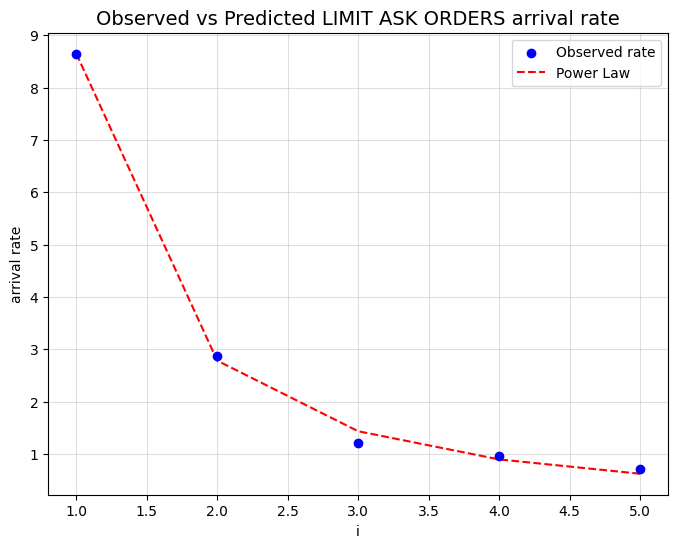

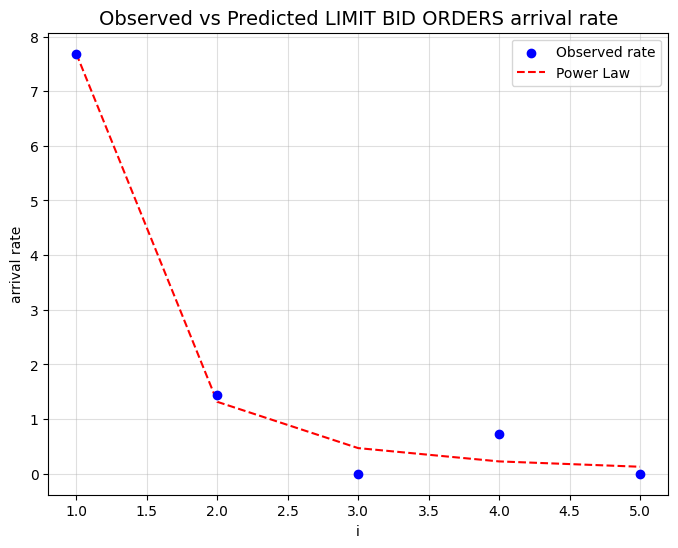

In [48]:

i_values = np.array([1, 2, 3, 4, 5])


predicted_lambda_ask = k_ask / (i_values ** alpha_ask)
predicted_lambda_bid = k_bid / (i_values ** alpha_bid)

plt.figure(figsize=(8, 6))
plt.scatter(i_values, arrival_rate_ask, color='blue', label='Observed rate', zorder=5)
plt.plot(i_values, predicted_lambda_ask, color='red', label='Power Law', linestyle='--')
plt.title("Observed vs Predicted LIMIT ASK ORDERS arrival rate", fontsize=14)
plt.xlabel("i")
plt.ylabel("arrival rate")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(i_values, arrival_rate_bid, color='blue', label='Observed rate', zorder=5)
plt.plot(i_values, predicted_lambda_bid, color='red', label='Power Law', linestyle='--')
plt.title("Observed vs Predicted LIMIT BID ORDERS arrival rate", fontsize=14)
plt.xlabel("i")
plt.ylabel("arrival rate")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Sample for data with lesser number of datapoints (only 50)


Estimated k : 0.5246268966101535
Estimated alpha: 0.7045464359307182
------------------------------
Estimated k : 0.746981000313004
Estimated alpha: 1.2470383764131394


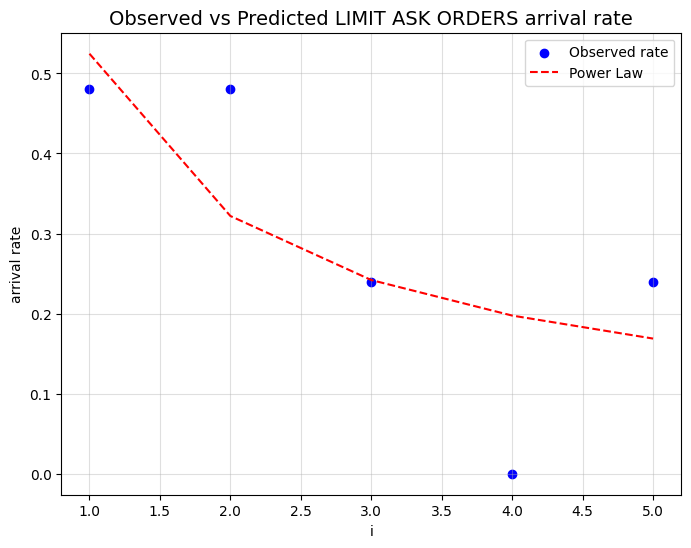

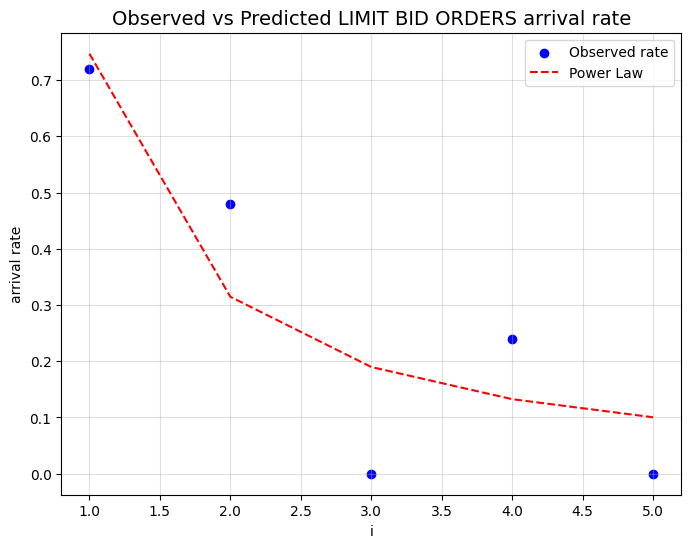

In [49]:
message_sample1 = pd.read_csv("50_message.csv")
orderbook_sample1 = pd.read_csv("50_orderbook.csv")

Nl_bid1 =   [0]*100
Nl_ask1 = [0]*100

for i in range(len(message_sample1)):
    type = message_sample1['type'][i]
    p =  message_sample1['price'][i]
    pa = orderbook_sample1['a1'][i]
    pb = orderbook_sample1['b1'][i]
    limit_arrival(type , p, pa, pb, Nl_bid1, Nl_ask1)
    
arrival_rate_ask1 = [0]*5
arrival_rate_bid1 = [0]*5
for i in range(1,6) :
    arrival_rate_bid1[i-1] = Nl_bid1[i] / T
    arrival_rate_ask1[i-1] = Nl_ask1[i] / T

k_ask1, alpha_ask1 = estimating_parameters(arrival_rate_ask1)
print("------------------------------")
k_bid1, alpha_bid1 = estimating_parameters(arrival_rate_bid1)    



predicted_lambda_ask1 = k_ask1 / (i_values ** alpha_ask1)
predicted_lambda_bid1 = k_bid1 / (i_values ** alpha_bid1)

plt.figure(figsize=(8, 6))
plt.scatter(i_values, arrival_rate_ask1, color='blue', label='Observed rate')
plt.plot(i_values, predicted_lambda_ask1, color='red', label='Power Law', linestyle='--')
plt.title("Observed vs Predicted LIMIT ASK ORDERS arrival rate", fontsize=14)
plt.xlabel("i")
plt.ylabel("arrival rate")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(i_values, arrival_rate_bid1, color='blue', label='Observed rate')
plt.plot(i_values, predicted_lambda_bid1, color='red', label='Power Law', linestyle='--')
plt.title("Observed vs Predicted LIMIT BID ORDERS arrival rate", fontsize=14)
plt.xlabel("i" )
plt.ylabel("arrival rate")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


## Limit order arrival rate (RESULT)<br>Based on power law

In [50]:
print(f"lambda_ask : {k_ask:.2f}/i^{alpha_ask:.2f} ")
print(f"lambda_bid : {k_bid:.2f}/i^{alpha_bid:.2f} ")

# k/i^alpha

lambda_ask : 8.65/i^1.64 
lambda_bid : 7.69/i^2.55 


## Market order arrival rate

In [51]:

T = 250/60

# we have that the market order arrival rate is estimated by mu = (N/T)*(Sm/Sl)

# Note here that mu id seperate for bid and ask which can also be justified

# N here is the total number of market orders of ask/bid  ,
# Sm is the avg size of market orders of ask/bid respectively,
# Sl is the avg size of limit orders of ask/bid respectively.

#however since in this example since we have considered that only 1 quantity at a time ,
# we would have that Sl  = 1 and Sm = 1 as well

#total number of timestamps in our data is 250


Sm_ask = 1
Sl_ask = 1

Sm_bid = 1
Sl_bid = 1

#Nma is the number of times we recieved market ask order i.e order type 4
#Nm_bid is the number of times we recieved market bid order i.e order type 3

Nm_ask = 0
Nm_bid = 0

for i in range(len(message_sample)) :
    type = message_sample['type'][i]
    if (type == 3):
        Nm_bid+=1
    elif (type == 4) :
        Nm_ask+=1

market_arrival_rate_bid = (Nm_bid/T)*(Sm_bid/Sl_bid)
market_arrival_rate_ask = (Nm_ask/T)*(Sm_ask/Sl_ask)

print(f"Mu_ask : {market_arrival_rate_ask} ")
print(f"Mu_bid : {market_arrival_rate_bid} ")

Mu_ask : 12.239999999999998 
Mu_bid : 7.68 


## Cancellation rate

In [52]:
# initially we have set up x, but not used in predicting the rate of market and limit orders
# but x is used to find the arrival rate of cancellation order
# Because for predicting the rate of cancellation orders, we need X since we need to the number of outstanding orders at all instants
x = [0]*100


# we define Qi =  is the average number of orders at a distance of i ticks from the opposite best quote
Qi_B = [0]*5
Qi_A = [0]*5

T = 250/60 # total time
M = 250 # total number of quote orders
Sl  = 1 # 
Sc = 1

Nc = [0]*5

for i in range(len(message_sample-1)) :
    type = message_sample['type'][i]
    p =  message_sample['price'][i]
    pa = orderbook_sample['a1'][i]
    pb = orderbook_sample['b1'][i]
    price_index = int(p/100)
    best_ask_index  = int(pa/100)
    best_bid_index  = int(pb/100)

    if type == 5 :
      if p < pa and  x[price_index] <0:
        dist = best_ask_index - price_index
        if dist>0 and dist<= 5 :
          Nc[dist-1] += 1
    elif type == 6 :
      if p > pb and  x[price_index] >0:
        dist = price_index - best_bid_index
        if dist>0 and dist<= 5 :
          Nc[dist-1] += 1

    for j in range(0,5) :
      if (price_index < best_ask_index and x[price_index] <0): #only these are valid buy orders, so we need to cancel these only
        if best_ask_index - j < 0:
          break   
        Qi_B[j] -= x[best_ask_index - j]
 
      if ( price_index > best_bid_index and x[price_index] >0): #only these are valid ask orders, so we need to cancel these only
        if best_bid_index + j > 100:
          break
        Qi_A[j] += x[best_bid_index + j]
 

    x = update_vector (x, type, p, pa, pb)

#since average
for i in range(0, 5):
   Qi_A[i]/= M
   Qi_B[i]/= M

Qa = np.array(Qi_A)
Qb = np.array(Qi_B)


# for cancellation orders we will consider only one rate for both the ask and bid orders by taking the average
# (as suggested by CST2010 paper)

Qi = (Qa+ Qb)/2
print(Qi) 
print(Nc)

Theta = (Nc/(Qi*T) )*(Sc/Sl)
Theta.tolist()
Theta_i = [round(num, 2) for num in Theta]
print("Theta i :" ,Theta_i)

cancellation_rate_i = [0]*5
pa_last  = orderbook_sample['a1'][len(message_sample)-1]
pb_last  = orderbook_sample['b1'][len(message_sample)-1]
last_pa_index = int(pa_last/100)
last_pb_index = int(pb_last/100)


# expected rate of cancellation of buy order at a price p (p should be less than best ask price) 
# = Theta_i * number of orders pending at the that price p ((1) only magnitude, we just need the number of pending orders)
#                                                          ((2) the pending orders may be ask or bid, both are equal )

# -> cancellation rate at a price p depends on 2 major things -> 1) the distance from the the opposite best quote
                                                            # -> 2) the number of outstanding orders at that price

for i in range(5):
  cancellation_rate_i[i] = Theta_i[i]*np.abs(x[last_pa_index-i-1])

print("CANCELLATION RATE :" , cancellation_rate_i)


# -> assumptions with data
# -> cancellations orders are occuring in the beginning before the limit orders (no proper data issue) is making the result problematic.


# *NOTE*

# unlike market and limit orders ,the rate in cancellation case is dependent on the number of pending orders at very instant 
# we will consider the rate of cancellation order at the final instant (after completing 250 rows)
# at every price tick , there is a chance of getting a cancellation bid order or ask order
# for this 


[0.108 0.438 0.222 0.082 0.012]
[11, 0, 2, 0, 0]
Theta i : [24.44, 0.0, 2.16, 0.0, 0.0]
CANCELLATION RATE : [0.0, 0.0, 6.48, 0.0, 0.0]


In [53]:
# complications with the lobster data 
# ---> not in sync with the CST2010 
# 1) there is no market order data
# 2) partial cancellation and executions orders are also there in lobster data
# 3) the data is from a stage in from a time stamp in between -> so X is not exmpty from initial as we considered here



# note
# 1)rates for both ask and bid are seperate or not
